#EXERCISE-2

In [ ]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time)

Time taken to compute inverse of A: 0.0041380889999800274


#Que.2

In [ ]:
def evalf(n,x):  
  assert type(x) is np.ndarray and len(x) == n 
  fun_val = 0
  for i in range(n-1):
    fun_val = fun_val + (x[i] -1)**2 + ( x[0] - (x[i])**2 )**2  
  return fun_val 

In [ ]:
def evalg(n,x):  
  assert type(x) is np.ndarray and len(x) == n 
  grad =[2*(x[0]-1) + 2*(x[0] - x[0]**2)*(1-2*x[0])]
  if n>=2:
   for i in range(1,n):
     grad[0] = grad[0] + 2*(x[0] - x[i]**2)
  for j in range(1,n):
     grad.append(2*(x[j] -1) - 4*x[j]*(x[0] - x[j]**2)) 
  grad_arr = np.array(grad)   
  return grad_arr

In [ ]:
def compute_steplength_backtracking(n, x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  while  evalf(n , x+alpha*direction)> evalf(n,x) + gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [ ]:
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer_BFGS(n,start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray  and len(start_x) == n 
  assert type(tol) is float and tol>=0 

  x = start_x
  g_x = evalg(n,x).reshape((n,1)) 
  B_k = np.identity(n)/5
  

  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = - np.matmul(B_k, g_x)
    step_length = compute_steplength_backtracking(n, x, g_x, p_k, alpha_start, rho, gamma)
    
    x_0 = x
    x = x + np.multiply(step_length,p_k)
    s_k = x - x_0
    y_k = evalg(n , x) - evalg(n , x_0)
    u_k = (np.matmul(y_k.T,s_k))**(-1)

    first_term  = np.identity(n) - u_k*np.matmul(s_k,y_k.T)
    sec_term = np.identity(n) - u_k*np.matmul(y_k, s_k.T)
    B_k = np.matmul(np.matmul(first_term ,B_k),sec_term) + u_k*np.matmul(s_k,s_k.T)  

    k += 1 
    g_x = evalg(n, x) 

  return x,k, evalf(n, x)

# Que.3

In [ ]:
from tabulate import tabulate

n_lst = [1000,2500,5000,7500,10000]
my_tol = 10**(-3)
tt = []
obj = []
x = []
itr_lst = []

for n in n_lst:
  start_x = np.array([0 for i in range(n)]).reshape((n,1))
  time1 = timer()
  x_min ,k,fun  = find_minimizer_BFGS(n, start_x, my_tol, BACKTRACKING_LINE_SEARCH, 0.9, 0.5 ,0.5 )
  time2 = timer()
  itr_lst.append(k)
  x.append(x_min)
  obj.append(fun)
  time = time2 - time1
  tt.append(time)
  print(f"for n= {n}")
  print(f"optimizer={x_min}")
  print(f"time taken={time}")



for n= 1000
optimizer=[[0.99999939]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985

In [ ]:
for i in range(len(n_lst)):
  print("\nFor n :", n_lst[i], end = " ")
  print("Minimizer : ", x[i])


For n : 1000 Minimizer :  [[0.99999939]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.99999985]
 [0.999

In [ ]:
table = [["n", " bfgs timing "]]
for i in  range(len(tt)):
    table.append([n_lst[i] , tt[i] ])    
print(tabulate(table, headers = 'firstrow',tablefmt="grid"))

+-------+-----------------+
|     n |    bfgs timing  |
+=======+=================+
|  1000 |         2.44831 |
+-------+-----------------+
|  2500 |        19.8666  |
+-------+-----------------+
|  5000 |       135.095   |
+-------+-----------------+
|  7500 |       408.311   |
+-------+-----------------+
| 10000 |      1145.47    |
+-------+-----------------+


#Que.4

In [ ]:
def evalh(x,n):
  assert type(x) is np.ndarray and len(x) == n 
  hessn = np.zeros((n,n))
  hessn[0][0] = 2 -4*(x[0] - x[0]**2) + 2*(1- 2*x[0])**2
  if n>=2:
    for i in range(1,n):
      hessn[0][0] = hessn[0][0] + 2
      hessn[0][i] = -4*x[i]
  
  for i in range(1,n):
    hessn[i][i] = 2 - 4*(x[0] - x[i]**2) + 8*(x[i]**2)
    hessn[i][0] = hessn[0][i] 

  return hessn

In [ ]:
def find_minimizer_newton(n, start_x, tol,line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x)  == n
  assert type(tol) is float and tol>=0 

  x = start_x
  g_x = evalg(n,x ).reshape((n,1))
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x,n))
    p_k = -np.matmul(D_k, g_x)
    step_length = compute_steplength_backtracking(n,x, g_x, p_k, alpha_start, rho, gamma)
  
    x = np.add(x,np.multiply(step_length,p_k))
    k += 1 
    g_x = evalg(n,x)
  return x, k, evalf(n,x )

# Que.5

In [ ]:
n_lst = [1000,2500,5000,7500,10000]
my_tol = 10**(-3)
tt_n = []
obj_n = []
x_n = []
itr_lst_n = []

for n in n_lst:
  start_x = np.array([0 for i in range(n)]).reshape((n,1))
  time1_n = timer()
  x_min_n ,k_n,fun_n  = find_minimizer_newton(n, start_x, my_tol, BACKTRACKING_LINE_SEARCH, 0.9, 0.5 ,0.5 )
  time2_n = timer()
  itr_lst_n.append(k_n)
  x_n.append(x_min_n)
  obj_n.append(fun_n)
  time = time2_n - time1_n
  tt_n.append(time)
  print(f"for n= {n}")
  print(f"optimizer={x_min_n}")
  print(f"time taken={time}")


for n= 1000
optimizer=[[0.99999973]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 

In [ ]:
for i in range(len(n_lst)):
  print("\nFor n :", n_lst[i], end = " ")
  print("Minimizer : ", x_n[i])


For n : 1000 Minimizer :  [[0.99999973]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]
 [0.999

In [ ]:
table_n = [["n", " newton timing "]]
for i in  range(len(tt_n)):
    table_n.append([n_lst[i] , tt_n[i] ])    
print(tabulate(table_n, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════╤═══════════════════╕
│     n │    newton timing  │
╞═══════╪═══════════════════╡
│  1000 │           1.48088 │
├───────┼───────────────────┤
│  2500 │          11.3689  │
├───────┼───────────────────┤
│  5000 │          75.4417  │
├───────┼───────────────────┤
│  7500 │         245.397   │
├───────┼───────────────────┤
│ 10000 │         638.656   │
╘═══════╧═══════════════════╛


#Que.6

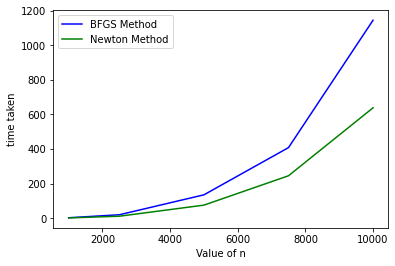

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_val,tt,"b")
plt.plot(n_val,tt_n,"g")
plt.xlabel("Value of n")
plt.ylabel("time taken")
plt.legend(["BFGS Method","Newton Method"]);

In the above graph we can clearly see that the BFGS is taking more time as compare to newton method for large value of n. as we increase the value of n the difference of time taken by BFGS method and Newton method increases.